# Activity 1.3 : Regularization

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST 


#### Procedures
Load the necessary libraries

In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Get the size of the sample train data

In [3]:
x_train[0].shape

(28, 28)

Check the sample train data

In [4]:
x_train[333] 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

Check the corresponding label in the training set

In [5]:
y_train[333]

8

Check the actual image

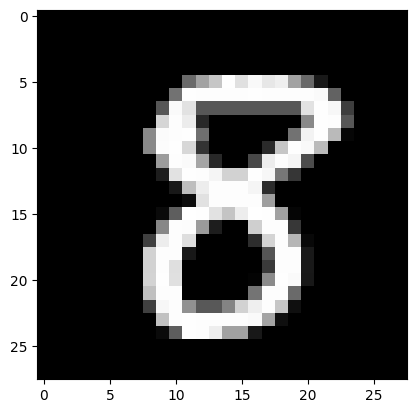

In [6]:
plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [7]:

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [8]:

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [9]:

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512. 
* Use dropout of 0.2 
* Check the model summary

In [10]:

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [12]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30


c:\Users\Nil\miniconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


469/469 [==============================] - 3s 4ms/step - loss: 0.5058 - accuracy: 0.8477 - val_loss: 0.1986 - val_accuracy: 0.9414
Epoch 2/30
469/469 [==============================] - 2s 3ms/step - loss: 0.2504 - accuracy: 0.9251 - val_loss: 0.1516 - val_accuracy: 0.9521
Epoch 3/30
469/469 [==============================] - 1s 3ms/step - loss: 0.2009 - accuracy: 0.9418 - val_loss: 0.1387 - val_accuracy: 0.9566
Epoch 4/30
469/469 [==============================] - 1s 3ms/step - loss: 0.1752 - accuracy: 0.9483 - val_loss: 0.1222 - val_accuracy: 0.9637
Epoch 5/30
469/469 [==============================] - 1s 3ms/step - loss: 0.1553 - accuracy: 0.9542 - val_loss: 0.1106 - val_accuracy: 0.9662
Epoch 6/30
469/469 [==============================] - 1s 3ms/step - loss: 0.1463 - accuracy: 0.9563 - val_loss: 0.1122 - val_accuracy: 0.9667
Epoch 7/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1337 - accuracy: 0.9609 - val_loss: 0.1029 - val_accuracy: 0.9685
Epoch 8/30
469/46

Use Keras evaluate function to evaluate performance on the test set

In [13]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10688835382461548
Test accuracy: 0.9757999777793884


Interpret the result

#type your answer here

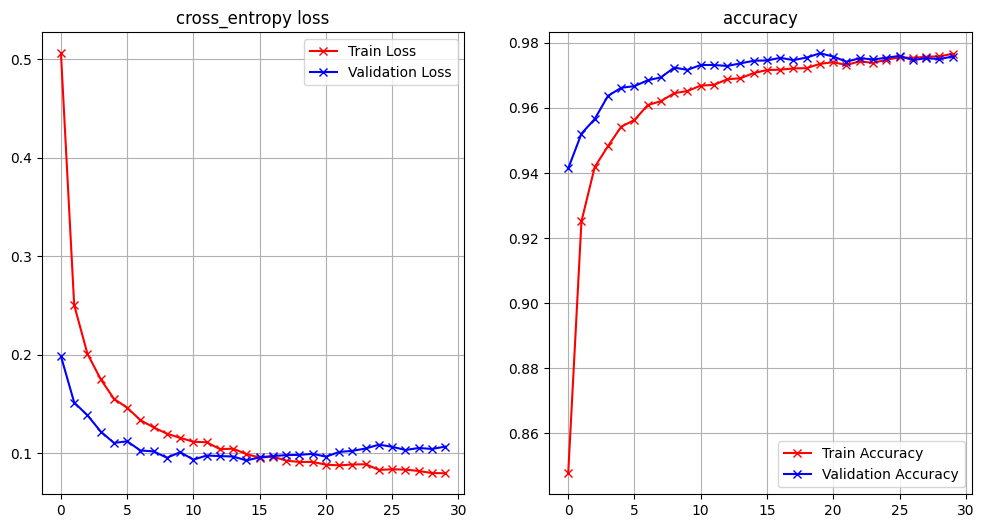

In [14]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

Interpret the result

#type your answer here

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [15]:
## Mount the dataset
import pandas as pd

df = pd.read_csv('data/Human_Activity_Recognition_Using_Smartphones_Data.csv',
                 skipinitialspace=True)
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [16]:
df.shape

(10299, 562)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 562 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), object(1)
memory usage: 44.2+ MB


In [18]:
df.isna().sum()

tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
                                       ..
angle(tBodyGyroJerkMean,gravityMean)    0
angle(X,gravityMean)                    0
angle(Y,gravityMean)                    0
angle(Z,gravityMean)                    0
Activity                                0
Length: 562, dtype: int64

In [19]:
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,0.126708,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.245443,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.019481,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,0.136245,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,0.288960,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
df["Activity"].value_counts()

Activity
LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: count, dtype: int64

Since we have more than 2 categorical values, we have ot one0hot encode it

In [21]:
dummies = pd.get_dummies(df["Activity"])
dummies.head()

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
0,False,False,True,False,False,False
1,False,False,True,False,False,False
2,False,False,True,False,False,False
3,False,False,True,False,False,False
4,False,False,True,False,False,False


In [22]:
## Split the dataset 
X = df.drop(columns='Activity', axis=1).values
y = dummies

In [23]:
## Normalize values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, shuffle=True, random_state=1, test_size=0.2)

In [25]:
## Create the Network
model_1 = Sequential()
model_1.add(Dense(400, activation='relu', input_shape=(561,)))
model_1.add(Dropout(0.4))
model_1.add(Dense(300, activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(6, activation='sigmoid'))

In [26]:
## Summary of the model
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 400)               224800    
                                                                 
 dropout_2 (Dropout)         (None, 400)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               120300    
                                                                 
 dropout_3 (Dropout)         (None, 300)               0         
                                                                 
 dense_5 (Dense)             (None, 6)                 1806      
                                                                 
Total params: 346,906
Trainable params: 346,906
Non-trainable params: 0
_________________________________________________________________


The previous model has

In [27]:
## 1st model
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])
 
history_1 = model_1.fit(
    X_train, y_train,
    batch_size = 128,
    epochs=20,
    verbose=1,
    validation_data=(X_test, y_test))

Epoch 1/20
65/65 [==============================] - 1s 11ms/step - loss: 0.5384 - accuracy: 0.8017 - val_loss: 0.3055 - val_accuracy: 0.8617
Epoch 2/20
65/65 [==============================] - 0s 6ms/step - loss: 0.2120 - accuracy: 0.9197 - val_loss: 0.1159 - val_accuracy: 0.9597
Epoch 3/20
65/65 [==============================] - 0s 6ms/step - loss: 0.1585 - accuracy: 0.9422 - val_loss: 0.1278 - val_accuracy: 0.9519
Epoch 4/20
65/65 [==============================] - 0s 4ms/step - loss: 0.1452 - accuracy: 0.9515 - val_loss: 0.0879 - val_accuracy: 0.9675
Epoch 5/20
65/65 [==============================] - 0s 4ms/step - loss: 0.1138 - accuracy: 0.9551 - val_loss: 0.0747 - val_accuracy: 0.9733
Epoch 6/20
65/65 [==============================] - 0s 4ms/step - loss: 0.1074 - accuracy: 0.9613 - val_loss: 0.0727 - val_accuracy: 0.9709
Epoch 7/20
65/65 [==============================] - 0s 4ms/step - loss: 0.0965 - accuracy: 0.9648 - val_loss: 0.1383 - val_accuracy: 0.9466
Epoch 8/20
65/65 [=

In [28]:
score_1 = model_1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_1[0])
print('Test accuracy:', score_1[1])

Test loss: 0.039687030017375946
Test accuracy: 0.9854369163513184


In [29]:
## 2nd model
from keras import regularizers

model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(561,), 
          kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(500, activation='relu',
          kernel_regularizer=regularizers.l2(0.010)),
    Dropout(0.1),
    Dense(6, activation='sigmoid')
])

In [30]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1000)              562000    
                                                                 
 dropout_4 (Dropout)         (None, 1000)              0         
                                                                 
 dense_7 (Dense)             (None, 500)               500500    
                                                                 
 dropout_5 (Dropout)         (None, 500)               0         
                                                                 
 dense_8 (Dense)             (None, 6)                 3006      
                                                                 
Total params: 1,065,506
Trainable params: 1,065,506
Non-trainable params: 0
_________________________________________________________________


In [31]:
model_2.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

 
history_2 = model_2.fit(
    X_train, y_train,
    batch_size = 500,
    epochs=25,
    verbose=1,
    validation_data=(X_test, y_test))

Epoch 1/25
17/17 [==============================] - 1s 16ms/step - loss: 7.2055 - accuracy: 0.7677 - val_loss: 5.8280 - val_accuracy: 0.9117
Epoch 2/25
17/17 [==============================] - 0s 7ms/step - loss: 5.0270 - accuracy: 0.9272 - val_loss: 4.1148 - val_accuracy: 0.9534
Epoch 3/25
17/17 [==============================] - 0s 7ms/step - loss: 3.5453 - accuracy: 0.9576 - val_loss: 2.9331 - val_accuracy: 0.9665
Epoch 4/25
17/17 [==============================] - 0s 7ms/step - loss: 2.5472 - accuracy: 0.9674 - val_loss: 2.1528 - val_accuracy: 0.9694
Epoch 5/25
17/17 [==============================] - 0s 7ms/step - loss: 1.8916 - accuracy: 0.9727 - val_loss: 1.6311 - val_accuracy: 0.9767
Epoch 6/25
17/17 [==============================] - 0s 7ms/step - loss: 1.4549 - accuracy: 0.9768 - val_loss: 1.2885 - val_accuracy: 0.9718
Epoch 7/25
17/17 [==============================] - 0s 6ms/step - loss: 1.1580 - accuracy: 0.9791 - val_loss: 1.0448 - val_accuracy: 0.9738
Epoch 8/25
17/17 [=

In [32]:
score_2 = model_2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

Test loss: 0.17860515415668488
Test accuracy: 0.9864077568054199


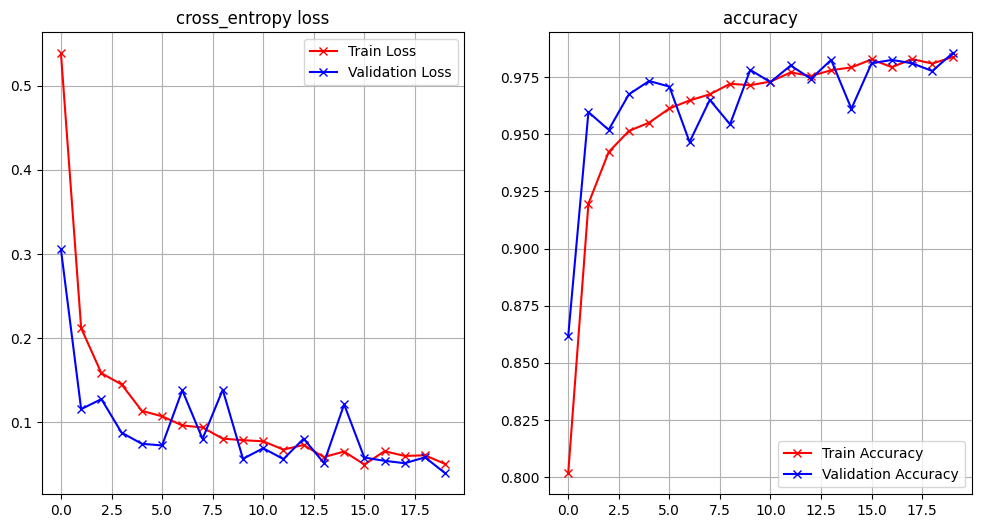

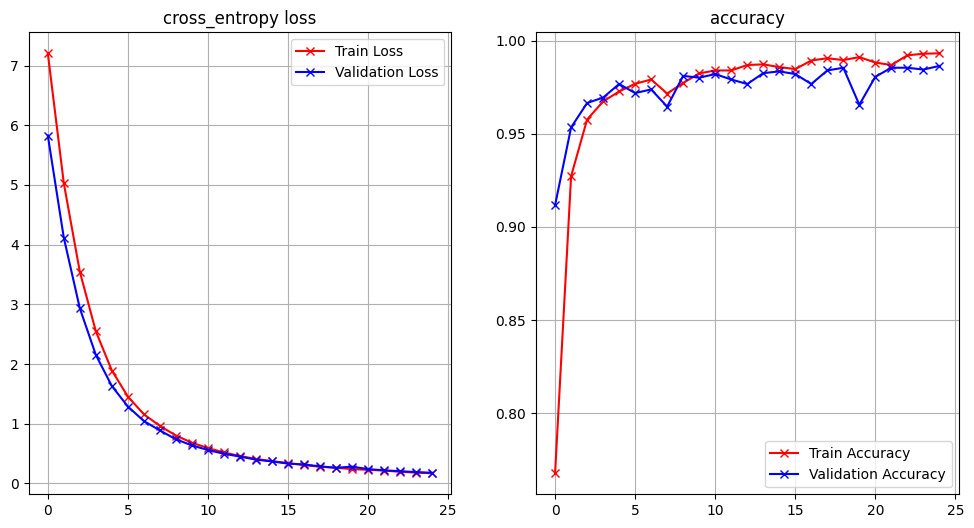

In [33]:
plot_loss_accuracy(history_1)
plot_loss_accuracy(history_2)

#### Conclusion

***The***